In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga dos dados

In [3]:
# Abrir dataset
df_pontuação = pd.read_csv('./datasets/pontuacao_teste.csv')

In [4]:
# Checar estrutura do dataset
df_pontuação.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [5]:
# Visualizar topo do df
df_pontuação.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [6]:
# Visualizar final do dataset
df_pontuação.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [7]:
# Medidas estatísticas das variáveis
df_pontuação.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

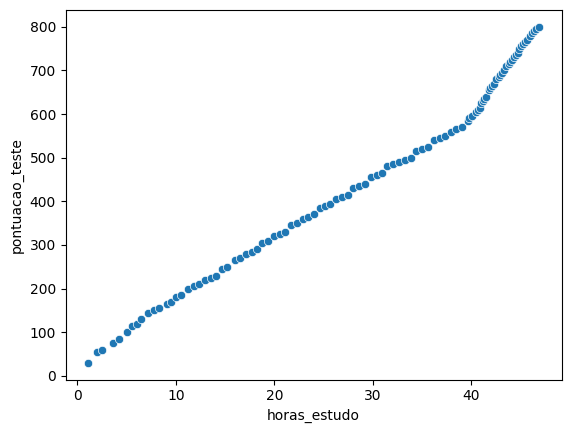

In [8]:
# Plot de Dispersão
# X = horas_estudo
# y = pontuacao_teste
sns.scatterplot(data=df_pontuação, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

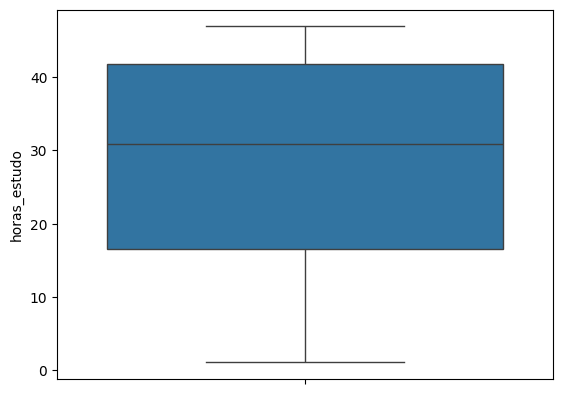

In [9]:
# Verificar se temos outliers
# Plot BoxPlot
# Variavel independente
sns.boxplot(df_pontuação, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

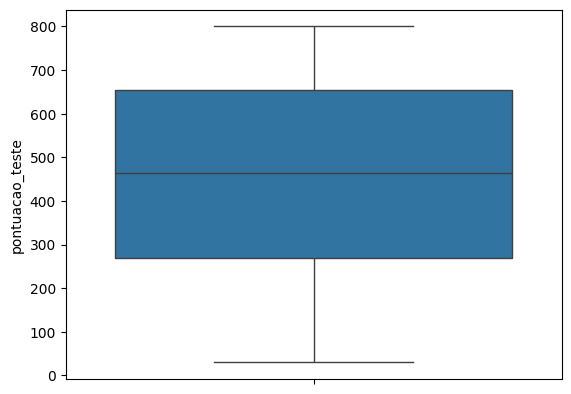

In [10]:
# Variavel dependente
sns.boxplot(df_pontuação, y='pontuacao_teste')

<Axes: >

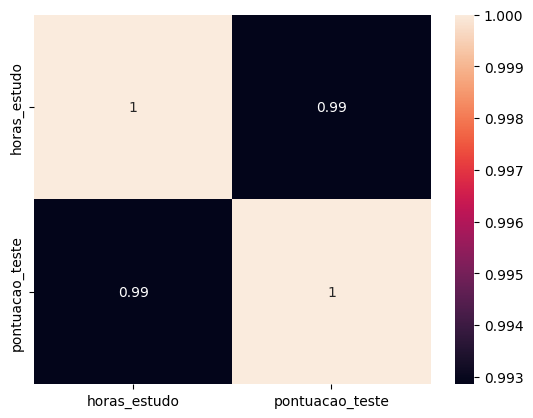

In [11]:
# Verificar Correlação - Pearson
sns.heatmap(df_pontuação.corr('pearson'), annot=True)

<Axes: >

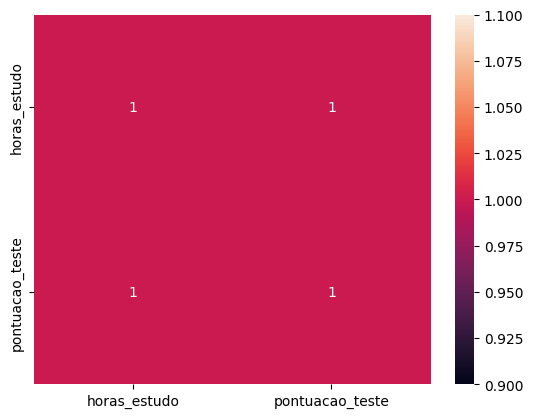

In [12]:
# Verificar Correlação - Spearman
sns.heatmap(df_pontuação.corr('spearman'), annot=True)

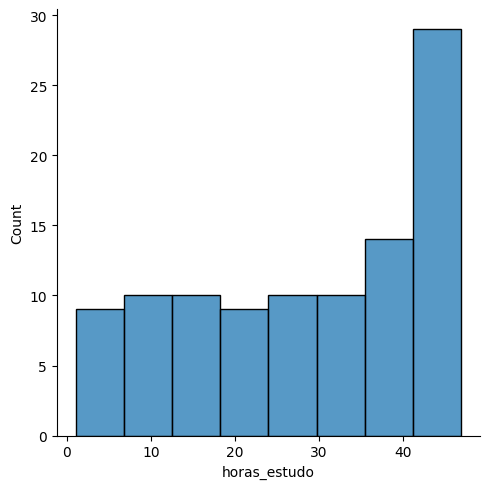

In [13]:
# Analisar a característica do dataframe em relação a distribuição
# Histograma das variáveis
sns.displot(df_pontuação, x='horas_estudo')

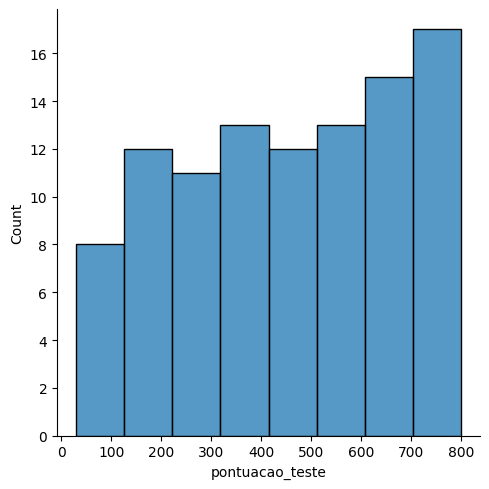

In [14]:
# Histograma das variáveis
sns.displot(df_pontuação, x='pontuacao_teste')

### Treinar modelo

In [15]:
# Dividir dataset entre treino e teste
# Quando temos apenas uma feature (uma variável independente) precisamos ajustar o shape
X = df_pontuação['horas_estudo'].values.reshape(-1, 1)
y = df_pontuação['pontuacao_teste'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [16]:
# Instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [17]:
# Treinar o modelo
reg_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Imprimir a equação da reta
# y = aX + b
print('A equação da reta é y = {:4f}x + {:4f}'.format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601


### Processo de Validação do Modelo através de métricas

In [19]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [ ]:
# Comparar predição de y_pred com y_test que é o valor real para aquele determinado X
# Calcular métrica R-squared ou Coeficiente de Determinação
# R2 representa a proporção na variação na variável dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
r2_score(y_test, y_pred) # diz que a proporção na variação da variável dependente é 98% perto de 1 sendo assim a métrica é boa, então está bom, mostra como uma coisa influencia na outra

0.9828400452912442

In [ ]:
# Métricas focada em erro - o modelo de regressão linear busca minimizar a soma dos erros quadráticos

# Calcular métrica MAE (Mean Absolute Error)
# MAE = Media (y_test - y_pred)
# É uma métrica fácil de interpretar
# MAE é menos sensível a outliers - Ele faz a soma dos erros não elevando ao quadrado
mean_absolute_error(y_test, y_pred)
# Você pode perguntar para o usuário se 22.95 pontos ou 23 pontos de erro absoluto é um número aceitável para uma predição?
# no nosso caso temos no total 800 pontos e 23 pontos de erro ou seja é uma margem aceitável mas dependendo do domínio de negocio pode não ser por exemplo, se fosse o total de 400 pontos e 23 pontos de erro, seria algo a se analizar

22.957470277134615

In [22]:
# Olhar do ponto de vista dos Erros Quadráticos podemos usar o MSE
# Calcular métrica MSE (Mean Squared Error)
# MSE = Media (y_test - y_pred)2
# Não é uma métrica fácil de interpretar
# MAE é mais sensível a outliers e penaliza grandes erros
# MSE você utiliza se você quer comparar dois modelos na questão de avaliar a forma como o algoritmo funciona vendo a forma de  minimização do processo de analisar outliers 
# O MSE atribui pesos aos conjuntos de dados para ajudar a analisar os erros e com eles posso medir se o meu algoritmo está gerando um erro maior ou menor mesmo que de forma discrepante e com isso posso ir lapidando, então o meu objetivo seria minimizar o MSE durante esse processo de validação do modelo
mean_squared_error(y_test, y_pred)

766.9972992416427

In [ ]:
# Podemos equilibrar tanto o MAE quanto MSE, penaliza os grandes erros porém ainda pode ser interpretável
# Calcular métrica RMSE (Root Mean Squared Error)
# RMSE = Raiz (Média (y_test - y_pred)2)
# É uma métrica fácil de interpretar
# É mais sensível a outliers e penaliza grandes erros
root_mean_squared_error(y_test, y_pred)

27.69471608884342

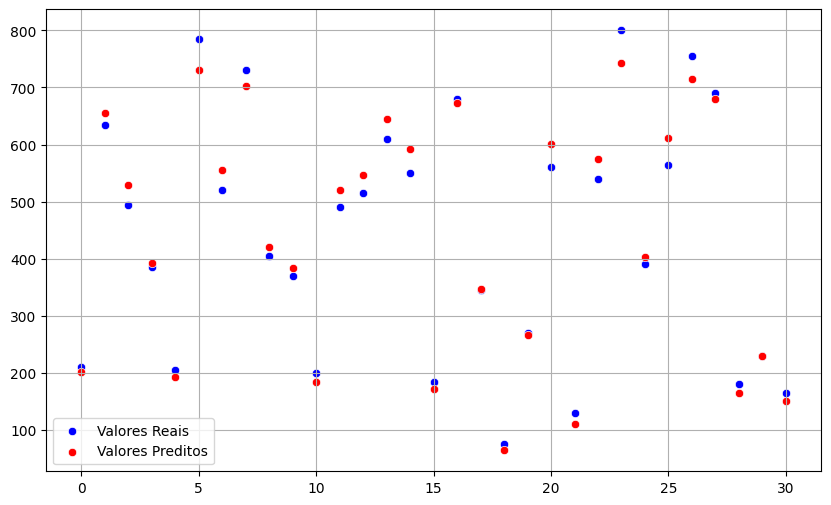

In [24]:
# Analise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color="blue", label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color="red", label='Valores Preditos')
plt.legend()
plt.grid(True)
plt.show()

### Validação de Modelos por meio da Análise de Resíduos

In [25]:
# Calcular resíduos
# residuos = variável_dependente - variável_predita
residuos = y_test - y_pred

In [26]:
# Calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - media) / desvio_padrão
from scipy.stats import zscore
residuos_std = zscore(residuos)

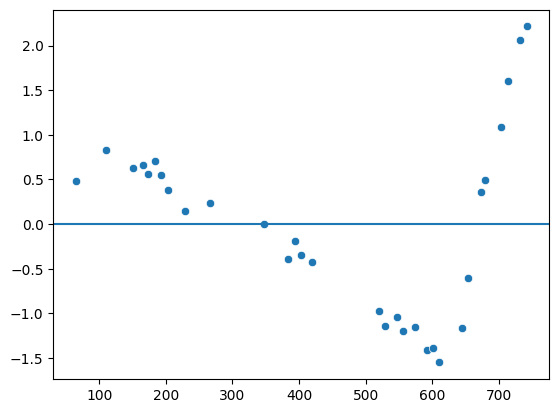

In [27]:
# Verificar linearidade do modelo:
# Se os resíduos estiverem entre -2 e +2 (na escala padrão) - isso indica linearidade nos resíduos

# Verificar homogeneidade das variâncias (homoscedasticidade)
# Valores estiverem em torno da reta, temos homoscedasticidade, caso contrário
# Se tivermos alguma tendência ou padrão (formam um cone, funil), há heterocedasticidade
sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

Text(0, 0.5, 'Resíduos na escala padrão')

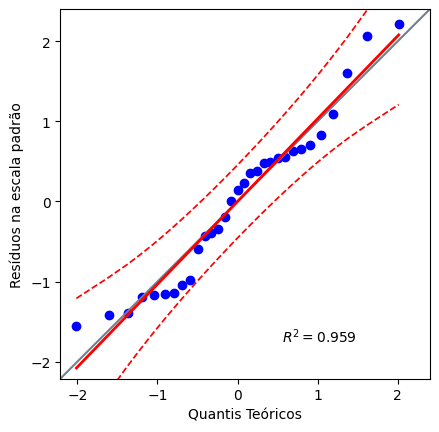

In [ ]:
# Checar se residuos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, que avalia se uma amostra segue uma distribuição normal
import pingouin as pg

pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')

In [29]:
# Teste de normalidade - Shapiro Wilk
# H0 - Segue distribuição normal
# H1 - Não segue uma distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
stat_shapiro , p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e P-Valor: {}".format(stat_shapiro, p_valor_shapiro))
# Aqui aceitamos o H0

Estatística do teste: 0.9500532226161759 e P-Valor: 0.15663817850304973


In [30]:
# Teste de normalidade - Kolmogorov-Smirnov
# H0 - Segue distribuição normal
# H1 - Não segue uma distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
stat_ks , p_valor_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste: {} e P-Valor: {}".format(stat_ks, p_valor_ks))
# Nesse caso rejeitamos o H0

Estatística do teste: 0.48355808450512827 e P-Valor: 3.395368995814077e-07


In [31]:
# Podemos notar que o modelo conseguiu prever bem as coisas dentro deste conjunto de informações que possuíamos, e se analisarmos os erros com a premissa de que temos 800 pontos no exame e que a margem de erro médio penalizando os grandes erros temos é de 28 pontos temos algo aceitável, mas precisamos validar com o especialista no domínio do problema
# Outra coisa que podemos considerar é que talvez a quantidade de dados apresentados não sejam suficientes, então poderíamos obter mais dados para o modelo
# Outra coisa que poderíamos considerar também é tentar fazer o split apenas com treino e teste poderíamos fazer com com outras técnicas como o kfold

### Fazer predições com o modelo

In [32]:
# Se eu estudar 30.4 horas, qual a pontuação prevista pelo modelo?
reg_model.predict([[30.4]])
# Como você pode ver o valor está um pouco a cima do valor da mediana dos dados, por isso é preciso validar com o especialista de domínio

array([[484.01220436]])

In [33]:
# Quantas horas estudar para obter 600 pontos (pelo modelo)?
# y = aX + b
# y - b = aX
# (y - b) / a = x
# x = (y - b) / a
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(37.81485802710669)

### Salvar modelo para usar depois

In [34]:
import joblib
joblib.dump(reg_model, './modelo_regressao.pkl')

['./modelo_regressao.pkl']